<a id="steps"></a>
## Elementos y funciones de Pandas para el análisis exploratorio de datos - I

Existen varios elementos del procedimiento exploratorio de los datos, los más importantes son:

1. Para importar, leer e inspeccionar los datos se puede usar:
  * `df.head(n)` - visualiza las primeras 'n' filas del conjunto de datos (por defecto n=5).
  * `df.tail(n)` - visualiza las últimas 'n' filas del conjunto de datos (por defecto n=5).
  * `df.columns()` - visualiza los nombres de las columnas.
  * `df.describe()` - devuelve una tabla que contiene un resumen estadístico básico de los datos.
  * `df.info()` - devuelve información sobre tipos de datos en cada columna.
  * `df[mascara]` - seleciona filas usando "máscara" (ejemplo de máscara (condición lógica): `df['id']>100`), combinando los dos: `df[df['id']>100]` devuelve todas las filas donde columna `id` tiene valor más grande que `100` (otro ejemplo: `df[df['id']==df['id'].min()]`, devuelve todas las filas donde columna `id` tiene valor minimo).
  *  `df['nombre_columna 1']` o `df[['nombre_columna 1','nombre_columna 2']]` - visualiza una o mas columnas
   
2. Para completar los datos y organizar las columnas:
  * `df.merge()` - une conjuntos de datos
  * `df[df.duplicated()] ` - visualiza filas con valores duplicados a través de todas las columnas.
  * `df.drop_duplicates(subset=['nombre_columna'])` - elimina valores duplicados en la columna.
  * `df.drop(['nombre_columna'], axis=1)`           - elimina columna.
  * `df['nueva_columna']=df['columna']/10.764` añade otros nuevos (utilizando cálculos).
  * `df.rename(columns={'nombre_columna_vieja': 'nombre_columna_nueva'})` cambia el nombre de las columnas.
  * `df['nombre_columna'] = df['nombre_columna'].astype(str)` - cambia tipo de valores de la columna.
  * `df['nombre_columna'] = df['nombre_columna'].replace(list_val_old,list_val_new)` - reemplaza los valores en la columna
  * `df['nombre_columna'] = df['nombre_columna'].apply(funcion)` - aplica funcion a los valores en la columna

3. para comprobar los tipos de datos y eliminar de los valores repetidos y `NaN` (Not-A-Number: vacías):
  * `df.info()` - devuelve información sobre tipos de datos en cada columna. 
  * `df.isna().sum()`  - suma de todos los valores NaN en cada columna.
  * `df['sqft_lot'].isna()` - máscara lógica de todos valores `NaN` útil combinando con `df[mascara]`, combinando los dos: `df[df['nombre_columna'].isna()]` devuelve todas filas NaN de columna `nombre_columna`.  
  * `df.dropna()` - elimina valores `NaN`, parámetro `axis=0`, lo que significa eliminar todas filas con valor NaN

4. Para revisar y comprender los datos:
  * `df['nombre_columna'].unique()`      - visualiza valores únicos de la columna.
  * `df['nombre_columna'].nunique()`      - cuenta valores únicos de la columna
  * `df['nombre_columna'].value_counts()` - suma frecuencia de valores de la columna (se usa para columnas con valores discretos).
  * `df.groupby(['nombre_columna_1']).mean()` - agrupa los datos de `nombre_columna_1` y devuelve los valores promedios de todas las otras columnas con respecto a la agrupación.
  * `df.groupby(['nombre_columna_1','nombre_columna_2']).mean()`  - agrupa los datos de `nombre_columna_1` y `nombre_columna_2`
  * `df['nombre_columna'].nlargest(10)` - visualiza los 10 valores numéricos más grandes de la columna.
 * `sns.countplot()` - visualiza las frecuencias de observaciones de la variable discreta.
 * `sns.histplot()`  - visualiza los recuentos de observaciones de la variable continua.
 * `sns.scatterplot()` - visualiza la relación entre dos variables. 
 * `sns.boxplot()` - visualiza la distribucion con respecto a las categorías de la variable
 * `sns.jointplot()` - visualiza la relación entre dos variables junto con las distribuciones.
 * `sns.pairplot()` - visualiza la relación entre distintas variables en forma de matriz. 

5. Para analizar series de tiempo:
  * `pd.to_datetime()` - convierte la columna que contiene valores de fecha y tiempo a formato entendido para Pandas, por ejemplo: `df['date'] = pd.to_datetime(df['date'])` 
  * `pd.DatetimeIndex()` - permite extración de año, mes, día y horario de formato de fecha,  por ejemplo: `df['year'] = pd.DatetimeIndex(df['date']).year` - crea una nueva columna que contiene el valor del año extraído de la columna con el formato de fecha completa.
  * `df.between()` - permite selecionar el rango de fechas (horas).

<a id="example"></a>
## Ejemplo de analisis exploratorio de datos

En el conjunto `kc_house_data.csv'` de datos están presentes los precios de venta de las casas en el condado de King, Estados Unidos. Incluye casas vendidas entre mayo de 2014 y mayo de 2015. Primero se debe saber sobre el conjunto de datos, ¿qué contiene?, ¿cuáles son sus características y cuál es la estructura de los datos?

## 1. Importar, leer e inspeccionar los datos.

Se inicia importando todas las bibliotecas y cargando el conjunto de datos como se muestra en el módulo anterior:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
import seaborn as sns           #visualisation

In [ ]:
import pandas as pd
df=pd.read_csv('data/kc_house_data.csv',sep=',')
df=pd.read_csv('https://raw.githubusercontent.com/mhemmg/datasets/master/housing/kc_house_data_D.csv',sep=',')

Es útil para ver el tamaño del conjunto de datos, saber cuántas columnas y filas tiene, y cuáles son los nombres de todas las columnas. 

In [ ]:
print('Numero de filas:',df.shape[0])
print('Numero de columnas:',df.shape[1])
print('Nombres de las columnas:',df.columns)

Numero de filas: 21615
Numero de columnas: 21
Nombres de las columnas: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition str', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Puede verse que el conjunto de datos contiene 21613 observaciones con 20 características, más el precio de la vivienda. Los nombres de las columnas con descripción son los siguientes:

    * "id": número de identificación de la vivienda
    * "Date": fecha en que se vendió la casa
    * "Price": el precio es el objetivo de predicción
    * "Bedrooms": número de dormitorios/casa
    * "Bathrooms": número de baños/casa
    * "Sqft_Living": pies cuadrados de la casa
    * "Sqft_Lot": pies cuadrados del lote
    * "Floors": total de pisos o niveles en casa
    * "Waterfront": casa que tiene vista a la costanera
    * "View": ha sido vista
    * "Condition": qué tan buena es la condición general
    * "Grade": calificación de vivienda, según el sistema del condado de King
    * "Sqft_above": pies cuadrados de la casa aparte del sótano
    * "Sqft_Basement": pies cuadrados del sótano
    * "Yr_Built": año de construcción
    * "Yr_Renovated": año en que se renovó la casa
    * "Zipcode": código postal
    * "Lat": coordenada de latitud
    * "Long": coordenada de longitud
    * "Sqft_Living15": área de la sala de estar en 2015 o implica algunas renovaciones
    * "Sqft_Lot15": área del tamaño del lote en 2015 o implica algunas renovaciones 

Aquí pueden verse las tres primeras filas de los datos para tener una idea de cómo están organizados:

In [ ]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


O las últimas tres filas:

In [ ]:
df.tail(3) # mostrar ultimas 3 filas del conjunto

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21614,1523300157,20141015T000000,325000.0,2,0.75,1020,1076.0,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Pueden realizarse operaciones sencillas para visualizar ciertas columnas y filas. 

Las columnas se pueden visualizar utilizando la notación entre corchetes o con notación del punto `.`

In [ ]:
df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21610    360000.0
21611    400000.0
21612    402101.0
21613    400000.0
21614    325000.0
Name: price, Length: 21615, dtype: float64

In [ ]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21610    360000.0
21611    400000.0
21612    402101.0
21613    400000.0
21614    325000.0
Name: price, Length: 21615, dtype: float64

In [ ]:
df['price'][0:5]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

*Es importante tener en cuenta que la impresión de una sola columna no produce un nueva `DataFrame`, sino un objeto llamado `DataSeries`. Puede verificarlo usted mismo guardando la salida de seleccionar una sola columna en una nueva variable y verificando su tipo usando función `type()`. Series es una estructura de datos de Pandas que representa un objeto unidimensional similar a una matriz de datos indexados. La diferencia entre Series y DatFrame es analógica a matriz y vector. No se profundizará en DataSeries en este curso.

La selección de filas y columnas en DataFrame se puede hacer de dos maneras: utilizando método `.loc[]` y método `.iloc[]` 

* El método `.loc[]` necesita nombres de las filas y columnas. Los nombres de las columnas son visibles, pero los nombres de las filas son los números que se almacenan en la primera columna del DataFrame (0,1,2,3,... los números no siempre tienen que comenzar desde 0!) 

Por ejemplo:

In [ ]:
df.loc[0:3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


*Tenga en cuenta que con `.loc()` se muestra la última fila a la que se hace referencia (0:3).

In [ ]:
df.loc[0:3,'price'] # antes de la coma cortamos las filas, después de la coma cortamos las columnas

0    221900.0
1    538000.0
2    180000.0
3    604000.0
Name: price, dtype: float64

* Por otro lado, el método `.iloc()` necesita índices (números enteros) de las filas y columnas). Por ejemplo:

In [ ]:
df.iloc[0:3] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
df.iloc[0:3,0]  # antes de la coma se cortan las filas, después de la coma las columnas

0    7129300520
1    6414100192
2    5631500400
Name: id, dtype: int64

*Observe que usando `.iloc`' no se ve la última fila referenciada (como en el `range()` de métodos y el corte...)

A continuación, más operaciones interesantes que pueden hacerse con Pandas:

Ahora, se obtiene el resumen estadístico de los conjuntos de datos. 

Si el DataFrame contiene datos numéricos, la descripción contiene esta información para cada columna:

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161500e+04,2.161500e+04,21615.000000,21615.000000,21615.000000,2.161400e+04,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000
mean,4.579945e+09,5.400672e+05,3.370807,2.114724,2079.874763,1.511002e+04,1.494263,0.007541,0.234282,7.656812,1788.337173,291.537590,1971.005968,84.394448,98077.936109,47.560039,-122.213873,1986.521351,12779.768864
std,2.876672e+09,3.671167e+05,0.930026,0.770136,918.402073,4.142026e+04,0.539985,0.086513,0.766285,1.175421,828.071354,442.564514,29.372179,401.661476,53.503930,0.138565,0.140843,685.367239,27328.234764
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Para entender mejor `df.describe()` se va a descifrar la información que devolvió: 

* count - el número de valores no vacíos
* mean - el valor promedio (por ejemplo, valor promedio del precio de la casa es 5.400881e+05 USD)  
* std - la desviación estándar (por ejemplo, desviación del precio promedio de la casa es 3.671272e+05 USD)  
* min - el valor mínimo (por ejemplo valor mínimo del precio de la casa es 7.500000e+04 USD)
* 25% - (percentil) significa, por ejemplo, que 25% de los precios son menores que 3.219500e+05  
* 50% - (percentil) significa, por ejemplo, que 50% de los precios son menores que 4.500000e+05  
* 75% - (percentil) significa, por ejemplo, que 75% de los precios son menores que 6.450000e+05  
* max - el valor máximo (por ejemplo, valor máximo del precio de la casa es 7.700000e+06 USD)   

`df.describe()` permite ver, de forma rápida, que el número máximo de dormitorios es 33 - lo que puede indicar un error en los datos.

También, permite insertar todas las filas en las que la columna `dormitorios` tiene un valor mayor que 10

In [ ]:
df[df['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8759,1773100755,20140821T000000,520000.0,11,3.00,3000,4960.0,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15872,2402100895,20140625T000000,640000.0,33,1.75,1620,6000.0,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Finalmente, se oberva que hay dos casas donde hay un gran número inusual de dormitorios. Luego eliminarse esas filas. 

## 2. Completar los datos y organizar las columnas.

El conjunto de datos tiene un código postal (`zipcode`) de columna, pero no se sabe a qué ciudad corresponde. No obstante, puede usarse otro conjunto de datos que contenga códigos postales y ciudades correspondientes y combinar las dos tablas. 

In [ ]:
import pandas as pd
df_addresses=pd.read_csv('data/zipcode_city.csv',sep=',',index_col=[0])

In [ ]:
df_addresses.head()

,zipcode,city
0,98178,Seattle
1,98125,Seattle
2,98028,Kenmore
3,98136,Seattle
4,98074,Sammamish


In [ ]:
df_addresses.shape

(501, 2)

El segundo conjunto de datos `df_addresses` tiene valores repetidos del código postal (501 filas!), por lo que deben eliminarse dichos valores.

In [ ]:
df_addresses=df_addresses.drop_duplicates(subset=['zipcode'])

In [ ]:
df_addresses.shape

(76, 2)

Antes de fusionar los dos conjuntos de datos `df` y `df_addresses` basados en la columna `zipcode`, es recomendable convertir esas columnas a una cadena. 

In [ ]:
df_addresses['zipcode'] = df_addresses['zipcode'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)

Ahora se fusionan los conjuntos de datos. Parámetro `left` (izquierda) significa que para cada valor en la tabla izquierda `df` se busca un valor correspondiente en la tabla derecha `df_addresses`.

In [ ]:
df = pd.merge(df, df_addresses, how="left", on="zipcode")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


Teniendo el conjunto de datos completo se eliminan algunas columnas, por ejemplo, columna: `id`; el parámetro `axis=1` se refiere a columna.

In [ ]:

df.drop(['id','zipcode'], axis=1)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,city
0,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,good,7,1180,0,1955,0,47.5112,-122.257,1340,5650,Seattle
1,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,good,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,Seattle
2,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,good,6,770,0,1933,0,47.7379,-122.233,2720,8062,Kenmore
3,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,excellent,7,1050,910,1965,0,47.5208,-122.393,1360,5000,Seattle
4,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,good,8,1680,0,1987,0,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,good,8,1530,0,2009,0,47.6993,-122.346,1530,1509,Seattle
21611,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,good,8,2310,0,2014,0,47.5107,-122.362,1830,7200,Seattle
21612,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,good,7,1020,0,2009,0,47.5944,-122.299,1020,2007,Seattle
21613,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,good,8,1600,0,2004,0,47.5345,-122.069,1410,1287,Issaquah


In [ ]:
df = df.drop(['id'], axis=1)

Luego, se cambian los nombres de las columnas que parecen crípticas

In [ ]:
df = df.rename(columns={'yr_build': 'year_build', 'yr_renovated': 'year_renovated'})

In [ ]:
print('Numero de columnas:',df.shape[1])

Numero de columnas: 21


Se cambia, de nuevo, el tipo del valor del código postal a entero

In [ ]:
df['zipcode'] = df['zipcode'].astype(int)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,good,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,good,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,good,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,excellent,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,good,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


## 3. Comprobar los tipos de datos, eliminar de los valores repetidos y `Nan`.

Después de combinar y completar los datos, se revisará el conjunto en el término de tipos de datos y valor non-numerical `NaN` (Not-A-Number)

Con función `info()` pueden verse las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21615 non-null  object 
 1   price           21615 non-null  float64
 2   bedrooms        21615 non-null  int64  
 3   bathrooms       21615 non-null  float64
 4   sqft_living     21615 non-null  int64  
 5   sqft_lot        21614 non-null  float64
 6   floors          21615 non-null  float64
 7   waterfront      21615 non-null  int64  
 8   view            21615 non-null  int64  
 9   condition str   21615 non-null  object 
 10  grade           21615 non-null  int64  
 11  sqft_above      21615 non-null  int64  
 12  sqft_basement   21615 non-null  int64  
 13  yr_built        21615 non-null  int64  
 14  year_renovated  21615 non-null  int64  
 15  zipcode         21615 non-null  int64  
 16  lat             21615 non-null  float64
 17  long            21615 non-null 

Puede observarse que la mayoría de las columnas tienen 21615 valores no vacíos, excepto la columna `sqft_lot` que muestra 21614 valores no vacíos, lo que significa que en esta columna hay un valor no vacío. Para analizar el caso más de cerca:

In [ ]:
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          1
floors            0
waterfront        0
view              0
condition str     0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
year_renovated    0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
city              0
dtype: int64

La columna `sqft_lot` contiene un valor nonumérico `Nan`

Puede visualizarse esta fila en particular usando el enmascaramiento lógico

In [ ]:
df[df['sqft_lot'].isna()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
109,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,great,...,1240,0,1985,0,98198,47.3813,-122.322,1270,4966,Des Moines


Y eliminar esta fila con valor NaN

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(21614, 21)

In [ ]:
df[df['sqft_lot'].isna()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city


Se verifica si el conjunto de datos tiene filas o columnas completamente repetidas

In [ ]:
df[df.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
99,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,excellent,...,1210,600,1980,0,98038,47.4109,-121.958,1650,135036,Maple Valley
100,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,excellent,...,1210,600,1980,0,98038,47.4109,-121.958,1650,135036,Maple Valley


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape[0])

number of duplicate rows:  2


Como hay filas duplicadas, se eliminan

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(21612, 21)

También, puede eliminarse la fila con la casa que tiene 33 dormitorios

In [ ]:
df[(df['bedrooms']<10) & (df['bedrooms']>5)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
211,20140717T000000,464000.0,6,3.00,2300,3404.0,2.0,0,0,good,...,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312,Seattle
234,20141121T000000,315000.0,6,2.75,2940,7350.0,1.0,0,0,good,...,1780,1160,1978,0,98023,47.3103,-122.339,2120,8236,Federal Way
241,20140529T000000,472000.0,6,2.50,4410,14034.0,1.0,0,2,great,...,2350,2060,1965,0,98003,47.3376,-122.324,2600,13988,Federal Way
333,20150416T000000,279000.0,6,1.75,2240,11180.0,2.0,0,0,great,...,2240,0,1955,0,98198,47.4200,-122.323,1590,7955,Des Moines
488,20140711T000000,1067000.0,6,3.50,4860,11793.0,2.0,0,0,good,...,3860,1000,1998,0,98006,47.5521,-122.137,3600,11793,Bellevue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20986,20141015T000000,343000.0,6,5.00,2732,7655.0,2.0,0,0,good,...,2732,0,2009,0,98002,47.3045,-122.211,3078,69993,Auburn
21087,20150318T000000,677790.0,6,3.00,2800,4213.0,2.0,0,0,good,...,2800,0,1998,0,98117,47.6892,-122.389,1440,3960,Seattle
21188,20150114T000000,303500.0,6,4.50,3390,7200.0,2.0,0,0,good,...,2440,950,2007,0,98118,47.5205,-122.288,2040,7214,Seattle
21377,20140717T000000,1174660.0,6,3.50,4310,7760.0,2.0,0,0,good,...,3260,1050,2013,0,98059,47.5297,-122.155,4620,10217,Renton


In [ ]:
#df=df[df['bedrooms']<30]

In [ ]:
#df.shape

## 4. Revisar y comprender los datos seleccionados en términos de tamaño y tipo de datos usando número y nombre de las columnas.

Después de fusionarlos, es posible saber en qué ciudades están las casas.  Las ciudades son: 

In [ ]:
df['city'].unique()

array(['Seattle', 'Kenmore', 'Sammamish', 'Union Hill-Novelty Hill',
       'Federal Way', 'Des Moines', 'Maple Valley', 'Bellevue', 'Duvall',
       'Auburn', 'Mercer Island', 'Kent', 'Redmond', 'Issaquah', 'Renton',
       'Newcastle', 'Normandy Park', 'Vashon', 'Covington', 'Kirkland',
       'Black Diamond', 'North Bend', 'Woodinville', 'Burien',
       'Snoqualmie', 'Enumclaw', 'Shoreline', 'Fall City', 'Bothell',
       'Seatac', 'Carnation', 'Medina'], dtype=object)

Ahora, se cuentan:

In [ ]:
df['city'].unique().shape
#len(df['city'].unique())

(32,)

Para ver cuántas de las casas se vendieron en cada ciudad:

In [ ]:
df['city'].value_counts()

Seattle                    7535
Bellevue                   1407
Renton                     1191
Auburn                     1037
Kirkland                    977
Sammamish                   800
Federal Way                 779
Issaquah                    733
Maple Valley                590
Redmond                     574
Covington                   548
Kent                        530
Woodinville                 471
Shoreline                   446
Newcastle                   406
Union Hill-Novelty Hill     405
Des Moines                  336
Snoqualmie                  310
Kenmore                     283
Mercer Island               282
Burien                      269
Normandy Park               254
Enumclaw                    234
North Bend                  221
Bothell                     195
Duvall                      190
Seatac                      136
Carnation                   124
Vashon                      118
Black Diamond               100
Fall City                    81
Medina  

En este caso, interesan las primeras 10 ciudades donde se vendieron más casas:

In [ ]:
df['city'].value_counts().nlargest(10)

Seattle         7535
Bellevue        1407
Renton          1191
Auburn          1037
Kirkland         977
Sammamish        800
Federal Way      779
Issaquah         733
Maple Valley     590
Redmond          574
Name: city, dtype: int64

In [ ]:
# o por el contrario:

df['city'].value_counts().nsmallest(10)

Medina            50
Fall City         81
Black Diamond    100
Vashon           118
Carnation        124
Seatac           136
Duvall           190
Bothell          195
North Bend       221
Enumclaw         234
Name: city, dtype: int64

Solamente en ciudad `Seattle`

In [ ]:
df['city'].value_counts()['Seattle']

7535

A continuación, se utilizará una herramienta más potente llamada `groupby`, para organizar y extraer la información aún mejor. Entonces, se agrupa todo el conjunto de datos en términos de ciudad y se encuentran los valores medios - `mean` (`max` o `min`) de cada columna. 

In [ ]:
df.groupby(['city']).mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
city,,,,,,,,,,,,,,,,,,
Auburn,2.866376e+05,3.413693,2.017358,1928.605593,18906.898746,1.445034,0.000000,0.093539,7.350048,1764.862102,163.743491,1979.315333,42.259402,98035.729990,47.314322,-122.225897,1844.349084,16713.778206
Bellevue,8.981876e+05,3.821606,2.401386,2642.721393,13186.778252,1.371357,0.009950,0.403696,8.421464,2150.872779,491.848614,1972.755508,96.690832,98005.932480,47.593897,-122.155711,2514.638237,12251.945984
Black Diamond,4.236660e+05,3.290000,2.027500,2137.590000,55465.300000,1.480000,0.000000,0.100000,7.400000,2000.340000,137.250000,1979.180000,218.370000,98010.000000,47.333210,-121.999470,2008.760000,47830.270000
Bothell,4.903515e+05,3.548718,2.278205,2253.097436,11314.138462,1.502564,0.000000,0.061538,7.774359,1954.558974,298.538462,1982.148718,50.810256,98011.000000,47.755192,-122.201174,2248.076923,9512.087179
Burien,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,0.014870,6.509294,1234.089219,234.535316,1952.721190,59.052045,98168.000000,47.489700,-122.307877,1471.680297,9744.022305
Carnation,4.556171e+05,3.000000,2.048387,2117.967742,96902.862903,1.504032,0.000000,0.185484,7.387097,1983.532258,134.435484,1980.927419,48.370968,98014.000000,47.671488,-121.848532,1929.016129,77979.620968
Covington,3.116321e+05,3.397810,2.126825,1982.259124,18954.771898,1.498175,0.000000,0.032847,7.425182,1847.094891,135.164234,1986.381387,58.357664,98042.000000,47.365665,-122.115453,1956.582117,14702.209854
Des Moines,3.001708e+05,3.178571,1.789435,1723.991071,10284.351190,1.223214,0.029762,0.494048,7.074405,1478.693452,245.297619,1966.092262,77.113095,98189.517857,47.398730,-122.318027,1695.863095,9379.008929
Duvall,4.247887e+05,3.363158,2.290789,2171.557895,39838.384211,1.721053,0.000000,0.021053,7.510526,2036.242105,135.315789,1991.642105,62.973684,98019.000000,47.737096,-121.954832,2103.721053,37016.510526


Parece demasiada información. Ahora, se verá cuál fue el precio más alto que alguien pagó en cada ciudad:

In [ ]:
df.groupby(['city']).max()['price'].nlargest(10)

city
Seattle          7700000.0
Bellevue         7062500.0
Medina           6885000.0
Mercer Island    5300000.0
Kirkland         5110800.0
Shoreline        4500000.0
Sammamish        3200000.0
Newcastle        3000000.0
Issaquah         2700000.0
Normandy Park    2510000.0
Name: price, dtype: float64

En esas ciudades las casas se vendieron por más de un millón de dólares. 

Acá se observa cómo se distribuyeron los precios máximos entre el número de habitaciones:

In [ ]:
df.groupby(['city']).mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
city,,,,,,,,,,,,,,,,,,
Auburn,2.866376e+05,3.413693,2.017358,1928.605593,18906.898746,1.445034,0.000000,0.093539,7.350048,1764.862102,163.743491,1979.315333,42.259402,98035.729990,47.314322,-122.225897,1844.349084,16713.778206
Bellevue,8.981876e+05,3.821606,2.401386,2642.721393,13186.778252,1.371357,0.009950,0.403696,8.421464,2150.872779,491.848614,1972.755508,96.690832,98005.932480,47.593897,-122.155711,2514.638237,12251.945984
Black Diamond,4.236660e+05,3.290000,2.027500,2137.590000,55465.300000,1.480000,0.000000,0.100000,7.400000,2000.340000,137.250000,1979.180000,218.370000,98010.000000,47.333210,-121.999470,2008.760000,47830.270000
Bothell,4.903515e+05,3.548718,2.278205,2253.097436,11314.138462,1.502564,0.000000,0.061538,7.774359,1954.558974,298.538462,1982.148718,50.810256,98011.000000,47.755192,-122.201174,2248.076923,9512.087179
Burien,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,0.014870,6.509294,1234.089219,234.535316,1952.721190,59.052045,98168.000000,47.489700,-122.307877,1471.680297,9744.022305
Carnation,4.556171e+05,3.000000,2.048387,2117.967742,96902.862903,1.504032,0.000000,0.185484,7.387097,1983.532258,134.435484,1980.927419,48.370968,98014.000000,47.671488,-121.848532,1929.016129,77979.620968
Covington,3.116321e+05,3.397810,2.126825,1982.259124,18954.771898,1.498175,0.000000,0.032847,7.425182,1847.094891,135.164234,1986.381387,58.357664,98042.000000,47.365665,-122.115453,1956.582117,14702.209854
Des Moines,3.001708e+05,3.178571,1.789435,1723.991071,10284.351190,1.223214,0.029762,0.494048,7.074405,1478.693452,245.297619,1966.092262,77.113095,98189.517857,47.398730,-122.318027,1695.863095,9379.008929
Duvall,4.247887e+05,3.363158,2.290789,2171.557895,39838.384211,1.721053,0.000000,0.021053,7.510526,2036.242105,135.315789,1991.642105,62.973684,98019.000000,47.737096,-121.954832,2103.721053,37016.510526


In [ ]:
df.groupby(['city','bedrooms']).max()['price'].nlargest(10)

city           bedrooms
Seattle        6           7700000.0
Bellevue       5           7062500.0
Medina         6           6885000.0
               5           5570000.0
Mercer Island  6           5300000.0
Kirkland       5           5110800.0
Mercer Island  5           4668000.0
Shoreline      5           4500000.0
Bellevue       4           4489000.0
Medina         4           4000000.0
Name: price, dtype: float64

Y, aquí, las casas más vendidas con respecto al número de habitaciones: 

In [ ]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2759
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

A veces es más fácil comprender las cosas visualizándolas; el paquete Seaborn es excelente para esta tarea, ya que está bien integrado con Pandas. Para mostrar la frecuencia del valor discreto, se usará seaborn countplot `sns.countplot`, los parámetros son: `data=df`. Lo que significa que se quiere usar todo el conjunto de datos de Panda y x=`bedrooms` es el nombre de la columna.

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

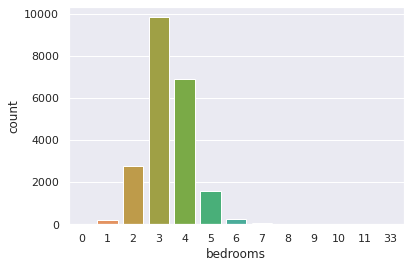

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) # tamano del plot
sns.countplot(data=df, x='bedrooms')

Luego, se observa qué rango de precios en los que se vendieron las casas fueron los más comunes. Como los precios no son variables discretas sino continuas, puede usarse `sns.histplot`

<AxesSubplot:xlabel='price', ylabel='Count'>

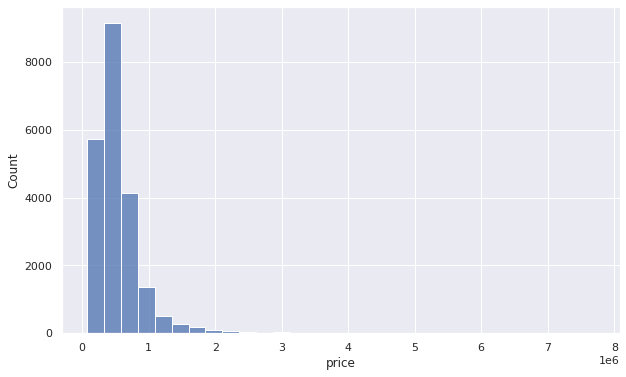

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.histplot(data=df, x="price", bins=30)

Una de las características más importantes que influye en el precio de la casa es su tamaño. Aquí se visualiza usando `sns.scatterplot`:

In [ ]:
df.columns

# columns_list=df.columns.to_list() # si es necesario, podemos convertir los nombres de las columnas en una lista

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition str', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'year_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'city'],
      dtype='object')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

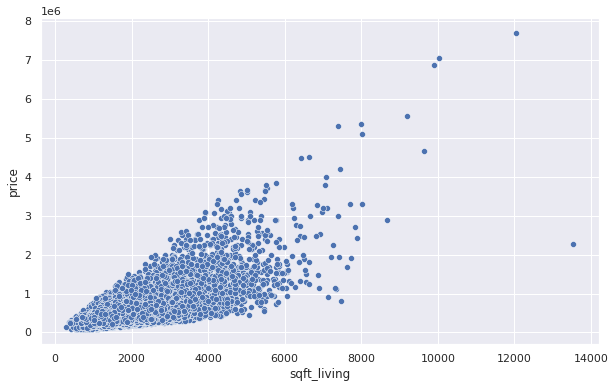

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.scatterplot(data=df, x='sqft_living',y='price')

La dependencia de precio de la casa de su tamaño es fuerte y es casi lineal.

También, es interesante ver cómo la ubicación geográfica de la casa influye en su popularidad. Seguidamente, se grafica la longitud frente a la latitud, pero incluyendo la distribución usando `sns.jointplot()`: 

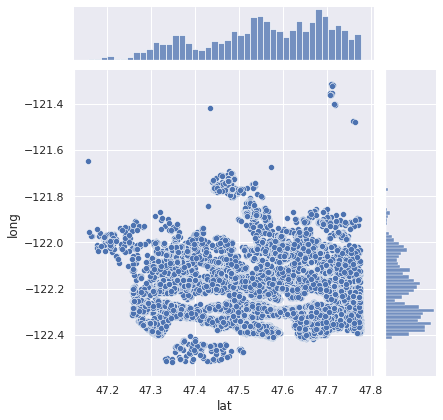

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.jointplot(data=df, x="lat", y="long")

Para la latitud entre -47.7 y -48.8 hay muchas casas, lo que significaría que, tal vez, sea una ubicación ideal. Pero cuando hablamos de longitud puede verse que la concentración es alta entre -122.2 a -122.4. Es decir, que la mayoría de las compras han sido para esta ubicación en particular.

Para ver la dependencia entre varias características de la casa deben seleccionarse las características que son de interés y trazar todas las combinaciones posibles usando `sns.pairplot()`.

In [ ]:
df_selection=df[['price', 'bedrooms','sqft_living']]

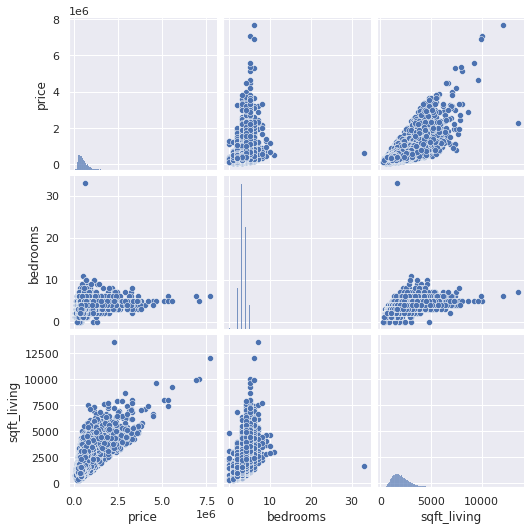

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.pairplot(df_selection)

En este apartado pudo verse cómo cada variable depende una de la otra. Por ejemplo, se ve claramente la distribución del precio de la vivienda con respecto al número de dormitorios. Pero también, que el tamaño de la casa, en promedio, depende del número de dormitorios. 

## 5. Series de tiempo (time series).


 Ahora, se verá cómo influye la época del año en la venta de las casas.
Primero debe convertirse la columna `date` ( que contiene la fecha de venta de la casa) a un formato de datos Pandas adecuado.

In [ ]:
df.head()['date']

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

*Si la columna `date` contenía en el conjunto de datos original una hora de venta, la función pd.to_datetime() también convertiría ese valor. 

In [ ]:
df.head()['date']

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

Podría usarse de nuevo el diagrama de dispersión sns

<AxesSubplot:xlabel='date', ylabel='price'>

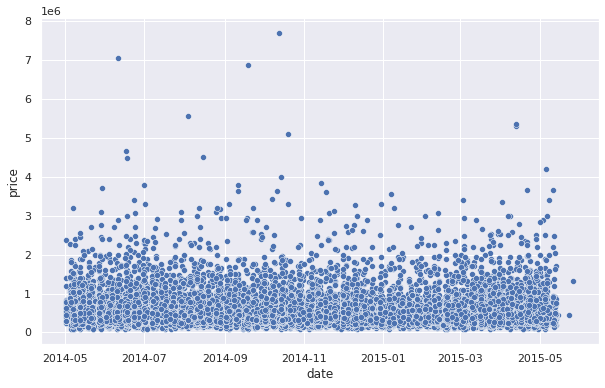

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.scatterplot(data=df,x='date', y='price')

Ya se tienen los datos en el formato correcto, pero la trama no es muy significativa. Se divide, entonces, la fecha en año, mes y día.

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year   # attribute year
df['month'] = pd.DatetimeIndex(df['date']).month # attribute month
df['day'] = pd.DatetimeIndex(df['date']).day     # attribute day

Observe que se han creado nuevas columnas llamadas `año`, `mes` y `día` en el conjunto de datos:

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition str,...,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,good,...,0,98178,47.5112,-122.257,1340,5650,Seattle,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,good,...,1991,98125,47.7210,-122.319,1690,7639,Seattle,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,good,...,0,98028,47.7379,-122.233,2720,8062,Kenmore,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,excellent,...,0,98136,47.5208,-122.393,1360,5000,Seattle,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,good,...,0,98074,47.6168,-122.045,1800,7503,Sammamish,2015,2,18


Se agrupan los datos con respecto a año, mes y día separadamente, y se calcula el valor promedio de precio

In [ ]:
#df.groupby('year').mean()['price']
df.groupby('month').mean()['price']
#df.groupby('day').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544949.980995
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

Ahora, se van a visualizar los resultados usando matplotlib. Observe el precio de la casa frente al año, el precio de la casa frente al mes y el precio de la casa frente al día:

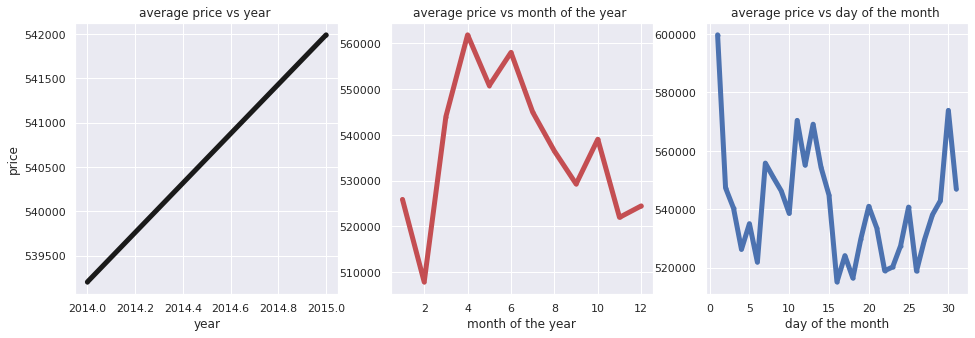

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(16,5))

ax[0].plot(df.groupby('year').mean()['price'],'.-k',lw=5)
ax[0].set_title('average price vs year ')
ax[0].set_xlabel('year')
ax[0].set_ylabel('price')
ax[0].grid(True)


ax[1].plot(df.groupby('month').mean()['price'],'.-r',lw=5)
ax[1].set_title('average price vs month of the year ')
ax[1].set_xlabel('month of the year')
ax[1].grid(True)

ax[2].plot(df.groupby('day').mean()['price'],'.-b',lw=5)
ax[2].set_title('average price vs day of the month ')
ax[2].set_xlabel('day of the month')
ax[2].grid(True)
#df2=df.groupby( 'month' ).mean()['price'].to_frame(name = 'count').reset_index()

Usando series de tiempo, ahora es mucho más fácil ver que el precio promedio de la casa aumentó durante el año. También, que el precio promedio fue mucho más alto en abril-junio que al final o al principio del año. Sobre todo, parece (con cierta incertidumbre) que el precio medio de la vivienda fue más alto a principio del mes y más bajo en la mitad del mes.

Las series de tiempo en Pandas permiten modificaciones muy flexibles. Si, por ejemplo, se estuviera interesado en saber cuántas casas se vendieron en el año 2014 en comparación con 2015, simplemente se podría seleccionar el rango de fechas que le interesan usando 'entre':

In [ ]:
df_2014=df[df['date'].between('2014-01-01', '2014-12-31')]

In [ ]:
df_2015=df[df['date'].between('2015-01-01', '2015-12-31')]

In [ ]:
print(f'Pudimos ver que en 2014 se vendieron: {df_2014.shape[0]} casas y en 2015:  {df_2015.shape[0]}') 

Pudimos ver que en 2014 se vendieron: 14632 casas y en 2015:  6980


Ahora, guarde el marco de datos actual en un nuevo archivo csv más limpio

In [ ]:
df.to_csv('data/kc_house_data_new.csv',sep=',',index=False)

# Comentarios sobre NaN y valores faltantes:

* Pandas puede marcar automáticamente los datos faltantes como valores `NaN` mientras carga el conjunto de datos, pero a veces hay valores que no solo están vacíos sino que tienen valores como `?`. En ese caso, podemos usar un método muy poderoso `df.replace()`: `df = df.replace(r'?',np.nan)` para reemplazar `?` con `NaN`. Después de eso, podemos eliminar todos los `NaN` con el método `dropna()` (`NaN` no es una cadena, es un valor especial en numpy: `np.nan`). 

* No siempre es una buena idea eliminar filas que contienen valores NaN. Por ejemplo, si hay un valor de NaN en la columna que no necesitaremos, entonces es mejor eliminar solo esa columna. O si analizamos los datos del medallistas deportivos y algunos deportistas tienen valores de NaN, tal vez signifique que no obtuvieron la medalla. Eliminar todo el registro NaN también sesgaría los datos.

# Otros metodos y funciones de Pandas

Veamos la columna ['condición']. Podemos ver cuántos valores únicos tiene esta columna usando `unique()`:


In [ ]:
df['condition str'].unique()

array(['good', 'excellent', 'great', 'bad', 'moderate'], dtype=object)

y podemos contarlos con `nunique()`

In [ ]:
df['condition str'].nunique()

5

Grafiquemos la distribución de las casas con cada condición usando `sns.boxplot()` (con una línea de valor medio (roja))

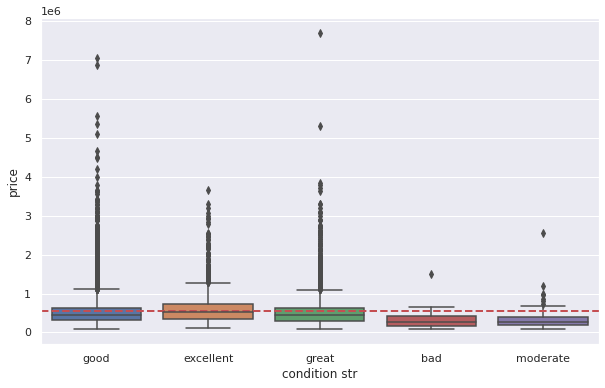

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
ax=sns.boxplot(x='condition str',y='price',data=df)
ax.axhline(df['price'].mean(),color='r',linestyle='dashed',linewidth=2)

Al aprendizaje automático le gustan los valores numéricos, por lo que podemos cambiar las cadenas en la columna ['condición str'] a valores numéricos ['condición num']. En pandas tenemos varias formas de modificar los datos dentro:

* método `df['column_name].replace([list_values_old],[list_values_new])`

In [ ]:
df['condition num'] = df['condition str'].replace(['bad','moderate','good','great','excellent'],[1,2,3,4,5])

In [ ]:
df[['condition str','condition num']]

,condition str,condition num
0,good,3
1,good,3
2,good,3
3,excellent,5
4,good,3
...,...,...
21610,good,3
21611,good,3
21612,good,3
21613,good,3


* método `function + apply`. 

Hay un método más más versátil. Se basa en el uso de una función en cada valor de la columna dada. Primero debemos definir la función que recibe un valor de cada celda de una columna dada y luego devolver un nuevo valor. Despues podemos llamar a esa función en los valores de una columna usando el método `apply`. Usando el mismo ejemplo que antes:

In [ ]:
def my_func(val):
    new_val=0
    if val=='excellent':
        new_val=5
    elif val=='great':
        new_val=4
    elif val=='good':
        new_val=3
    elif val=='moderate':
        new_val=2
    elif val=='bad':
        new_val=1
    return new_val 

In [ ]:
df['condition num'] = df['condition str'].apply(my_func)

In [ ]:
df[['condition str','condition num']]

,condition str,condition num
0,good,3
1,good,3
2,good,3
3,excellent,5
4,good,3
...,...,...
21610,good,3
21611,good,3
21612,good,3
21613,good,3


El uso de un método de función y `apply` es muy poderoso porque permite cualquier operación en la celda, ya sea una simple multiplicación o extracción de texto!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4710cf8b-f7ec-43d1-a3bc-46d860c0e6af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>